# IMDB Names dataset embedding


## install libs

In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.0 MB/s eta 0:00:00


In [2]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=7b012e0707a24bb37e7d53658d9a2a31f2081d9aad92c77e412ac8e97325958d
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [3]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 944.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82813 sha256=f9b536e715a95131dc34e5e12f9159091980763e334a384a1cc5ff7672c83a6b
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55621 sha256=a9b056a5754ec490aa706c50f247215f1ee48569939e140879dd6768c5dd5410
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


## Import dataset

In [4]:
import pandas as pd
import requests
import gzip
import shutil

# IMDb names dataset URL
names_url = "https://datasets.imdbws.com/name.basics.tsv.gz"
file_name = "name.basics.tsv.gz"

# Download the dataset
response = requests.get(names_url, stream=True)
with open(file_name, "wb") as file:
    shutil.copyfileobj(response.raw, file)

# Extract the dataset
!gzip -d $file_name --force

# Load the tsv file into a pandas DataFrame
df = pd.read_csv(file_name.replace(".gz", ""), sep='\t')

# Display the first few rows of the DataFrame
print(df.head())


      nconst      primaryName birthYear deathYear  \
0  nm0000001     Fred Astaire      1899      1987   
1  nm0000002    Lauren Bacall      1924      2014   
2  nm0000003  Brigitte Bardot      1934        \N   
3  nm0000004     John Belushi      1949      1982   
4  nm0000005   Ingmar Bergman      1918      2007   

                     primaryProfession  \
0       soundtrack,actor,miscellaneous   
1                   actress,soundtrack   
2  actress,soundtrack,music_department   
3              actor,soundtrack,writer   
4                writer,director,actor   

                            knownForTitles  
0  tt0053137,tt0045537,tt0050419,tt0072308  
1  tt0117057,tt0075213,tt0038355,tt0037382  
2  tt0056404,tt0054452,tt0049189,tt0057345  
3  tt0072562,tt0080455,tt0078723,tt0077975  
4  tt0083922,tt0050976,tt0069467,tt0050986  


In [5]:
df

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0053137,tt0045537,tt0050419,tt0072308"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0075213,tt0038355,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0056404,tt0054452,tt0049189,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0072562,tt0080455,tt0078723,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050976,tt0069467,tt0050986"
...,...,...,...,...,...,...
12743168,nm9993714,Romeo del Rosario,\N,\N,"animation_department,art_department","tt14069590,tt2455546,tt11657662"
12743169,nm9993716,Essias Loberg,\N,\N,NaN,\N
12743170,nm9993717,Harikrishnan Rajan,\N,\N,cinematographer,tt8736744
12743171,nm9993718,Aayush Nair,\N,\N,cinematographer,tt8736744


In [6]:
df_base = df.copy(deep=True)

## compute embeddings

Lets take a 1M sample.

In [7]:
df = df_base.sample(n=10000)

In [8]:
df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
12108754,nm9233990,Ryan Liam Murphy,\N,\N,art_department,tt7297562
7266422,nm3299009,John Oregon,\N,\N,actor,tt1349859
4755173,nm14070832,Marcelo Jacó,\N,\N,actor,tt8033694
8057087,nm4193503,Sean Loughlin,\N,\N,producer,"tt0136668,tt27832380,tt2090843"
5650228,nm15083067,Rakshith Govindegowda,\N,\N,camera_department,\N


In [9]:
len(df)

10000

## option: keep family name only

And backup `primaryName` to `completeName`.

In [10]:
df['completeName'] = df['primaryName']
df['primaryName'] = df['primaryName'].str.split(' ').str.get(1)

### install and test model

In [11]:
from transformers import BartTokenizer, BartModel

tokenizer = BartTokenizer.from_pretrained('facebook/bart-large')
model = BartModel.from_pretrained('facebook/bart-large')

inputs = tokenizer(["Hello, my dog is cute", "Hello, my cat is cute"], return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state


In [12]:
last_hidden_states.shape

torch.Size([2, 8, 1024])

In [13]:
import torch
sentence_embedding = torch.mean(last_hidden_states, dim=1)
embeddings = sentence_embedding.detach().cpu().numpy()
embeddings.shape

(2, 1024)

### compute embeddings

In [14]:
from tqdm import tqdm
import numpy as np


In [15]:
batch_size = 10
embeddings_list = []

# Wrapping the range object with tqdm for progress visualization
for i in tqdm(range(0, len(df.primaryName.values), batch_size), desc="Processing batches"):
    batch = df.primaryName.astype(str).values[i:i+batch_size]
    inputs = tokenizer(list(batch), return_tensors="pt", truncation=True, padding=True, max_length=50)
    outputs = model(**inputs)
    last_hidden_states = outputs.last_hidden_state
    sentence_embedding = torch.mean(last_hidden_states, dim=1)
    embeddings = sentence_embedding.detach().cpu().numpy()
    embeddings_list.append(embeddings)

# Concatenate all the batches
final_embeddings = np.concatenate(embeddings_list, axis=0)
print(final_embeddings.shape)
embeddings = final_embeddings


Processing batches: 100%|██████████| 1000/1000 [20:05<00:00,  1.21s/it]

(10000, 1024)


In [16]:
# embeddings = model.encode(df.primaryName.values, show_progress_bar=True)

In [17]:
# embeddings.shape

## PCA

It is fast but explained variance for 10 dimensions is 0.035, which is too low to represent the underlying 384 dimensions.


In [18]:
embeddings

array([[ 0.5570467 ,  2.1744678 , -1.5287256 , ...,  0.6803144 ,
         0.08973028,  0.5407879 ],
       [ 0.34554306,  1.4003856 , -1.4013255 , ...,  0.2068193 ,
        -0.3337749 ,  0.6523641 ],
       [ 0.3519519 ,  2.1675835 , -0.49999645, ...,  0.3708984 ,
         0.14153197,  0.77194154],
       ...,
       [-0.30309334,  1.9273312 , -1.9222721 , ...,  0.44590488,
         0.06857635,  0.68399256],
       [ 0.73880166,  1.3346214 , -1.5327412 , ...,  0.88471663,
         0.24099307, -0.17998102],
       [ 0.24649768,  0.98692405, -1.3754451 , ...,  0.7358643 ,
         0.29021052,  0.5355621 ]], dtype=float32)

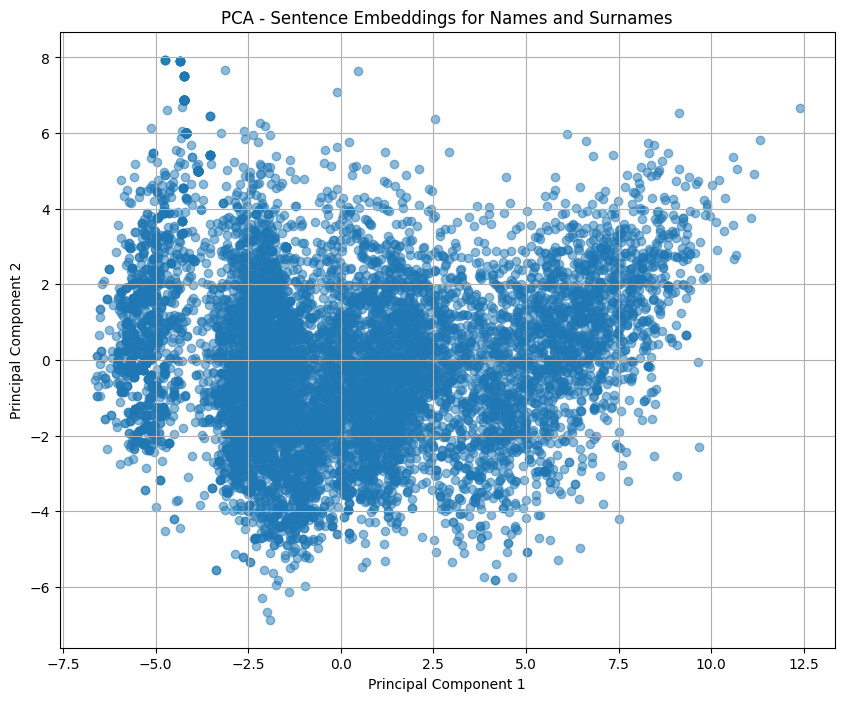

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

# Perform PCA
pca = PCA(n_components=2)  # Set n_components to the desired number of dimensions (e.g., 2 for 2D visualization)
reduced_embeddings = pca.fit_transform(embeddings)

# Convert the reduced embeddings to a DataFrame for visualization
df_reduced = pd.DataFrame(reduced_embeddings, columns=['Component 1', 'Component 2'])

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced['Component 1'], df_reduced['Component 2'], alpha=0.5)
plt.title('PCA - Sentence Embeddings for Names and Surnames')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [20]:
import numpy as np
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

explained_var_ratios = []
for n_components in range(2, 11):
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    explained_var_ratios.append(np.sum(pca.explained_variance_ratio_))

# Print the explained variance ratios for each dimension from 2D to 10D
for n, explained_var_ratio in enumerate(explained_var_ratios, start=2):
    print(f"Explained Variance Ratio for {n}D: {explained_var_ratio:.4f}")


Explained Variance Ratio for 2D: 0.1595
Explained Variance Ratio for 3D: 0.2002
Explained Variance Ratio for 4D: 0.2282
Explained Variance Ratio for 5D: 0.2552
Explained Variance Ratio for 6D: 0.2797
Explained Variance Ratio for 7D: 0.3021
Explained Variance Ratio for 8D: 0.3212
Explained Variance Ratio for 9D: 0.3382
Explained Variance Ratio for 10D: 0.3547


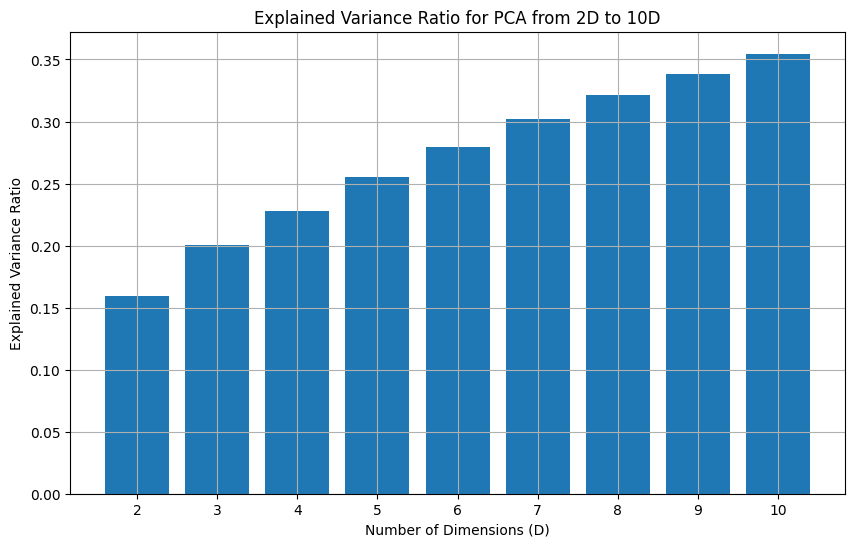

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

explained_var_ratios = []
for n_components in range(2, 11):
    pca = PCA(n_components=n_components)
    reduced_embeddings = pca.fit_transform(embeddings)
    explained_var_ratios.append(np.sum(pca.explained_variance_ratio_))

# Plot the explained variance ratios in a bar graph
plt.figure(figsize=(10, 6))
plt.bar(range(2, 11), explained_var_ratios)
plt.xlabel('Number of Dimensions (D)')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for PCA from 2D to 10D')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()


## UMAP

We find out that umap make a large blob. Not useful.

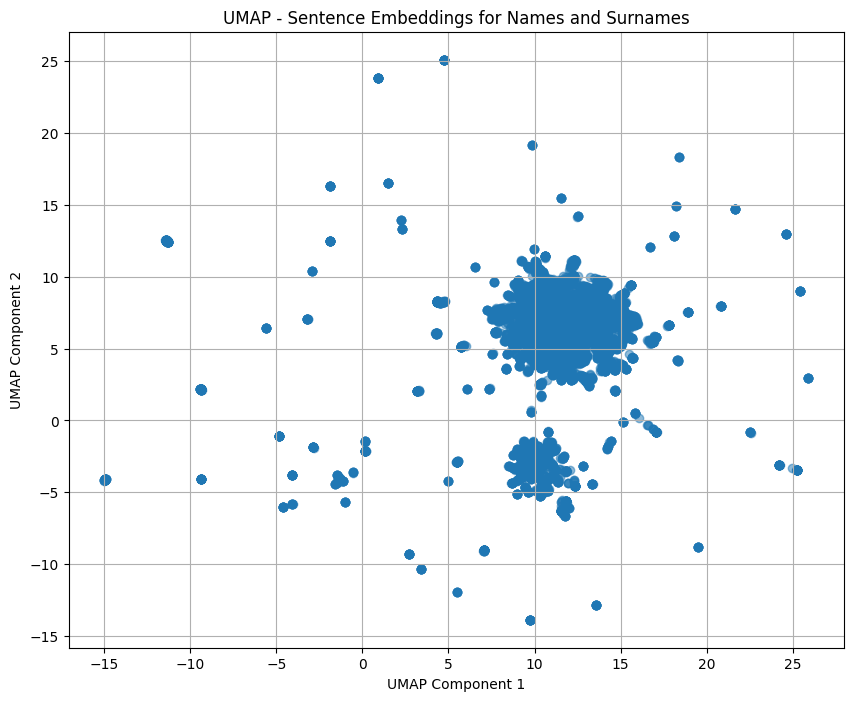

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
import umap

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

# Perform UMAP
umap_model = umap.UMAP(n_components=2)  # Set n_components to the desired number of dimensions (e.g., 2 for 2D visualization)
reduced_embeddings = umap_model.fit_transform(embeddings)

# Convert the reduced embeddings to a DataFrame for visualization
df_reduced = pd.DataFrame(reduced_embeddings, columns=['UMAP Component 1', 'UMAP Component 2'])

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced['UMAP Component 1'], df_reduced['UMAP Component 2'], alpha=0.5)
plt.title('UMAP - Sentence Embeddings for Names and Surnames')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.grid(True)
plt.show()


In [23]:
df_reduced

,UMAP Component 1,UMAP Component 2
0,9.364319,6.554148
1,9.056349,-3.427145
2,10.700789,8.693762
3,8.851613,6.535134
4,14.913574,8.556364
...,...,...
9995,10.383233,-3.245828
9996,13.650018,4.973240
9997,10.634096,5.392200
9998,10.688041,4.810246


In [24]:
df_reduced

,UMAP Component 1,UMAP Component 2
0,9.364319,6.554148
1,9.056349,-3.427145
2,10.700789,8.693762
3,8.851613,6.535134
4,14.913574,8.556364
...,...,...
9995,10.383233,-3.245828
9996,13.650018,4.973240
9997,10.634096,5.392200
9998,10.688041,4.810246


## Export UMAP dataset

In [25]:
df.reset_index(drop=True, inplace=True)

In [26]:
df_to_export = pd.merge(df, df_reduced, left_index=True, right_index=True)

In [27]:
df_to_export.to_csv('dimensions_ummap_v3.csv')

## TSNE

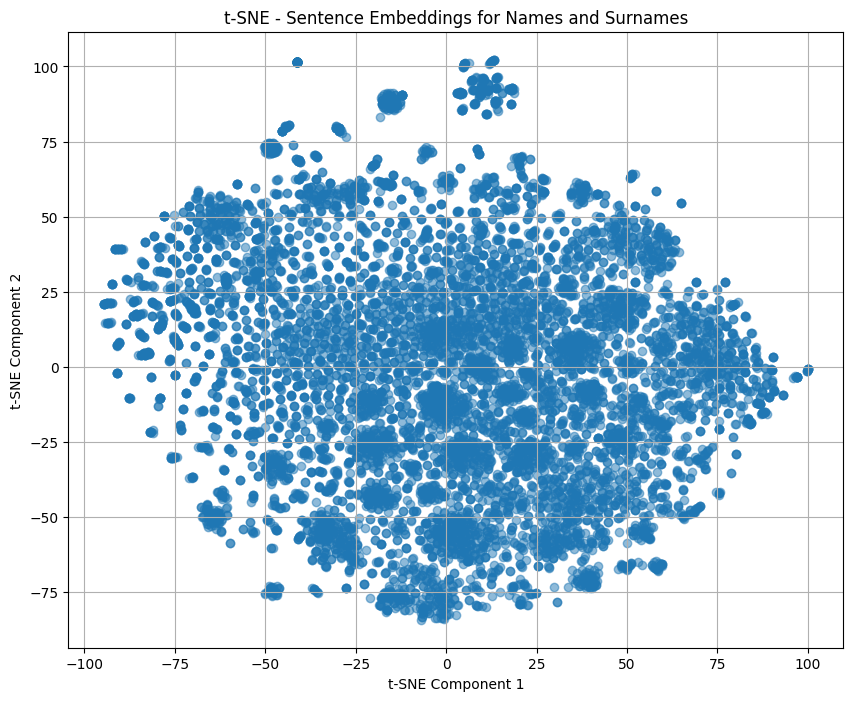

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE

# Replace this with your 'embeddings' data (300+ dimensional vectors for 10k names)
# For demonstration purposes, I'm using random embeddings of shape (10000, 384)
# embeddings = np.random.rand(10000, 384)

# Perform t-SNE
tsne_model = TSNE(n_components=2, random_state=42)  # Set n_components to the desired number of dimensions (e.g., 2 for 2D visualization)
reduced_embeddings = tsne_model.fit_transform(embeddings)

# Convert the reduced embeddings to a DataFrame for visualization
df_reduced = pd.DataFrame(reduced_embeddings, columns=['t-SNE Component 1', 't-SNE Component 2'])

# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(df_reduced['t-SNE Component 1'], df_reduced['t-SNE Component 2'], alpha=0.5)
plt.title('t-SNE - Sentence Embeddings for Names and Surnames')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


In [29]:
df_to_export = pd.merge(df, df_reduced, left_index=True, right_index=True)
df_to_export.to_csv('dimensions_tsne_v3.csv')